<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/Classification_grp_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#MODEL IMPORTS
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#VALIDATION METRICS
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

# **DATA PREPARATION AND CLEANING **

In [ ]:
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')
nltk.download('gutenberg')

def create_partitions(text, book_name, author):
    partitions = []
    words = nltk.word_tokenize(text)
    for i in range(0, len(words), 100):
        partitions.append((words[i:i+100], book_name, author))
    return partitions

#The books selected below are from the gutenberg module and are of the same genre 'novel'
book_names=['melville-moby_dick.txt','edgeworth-parents.txt','chesterton-thursday.txt','austen-emma.txt','shakespeare-hamlet.txt']

def random_sentences_with_book_name():
  result=pd.DataFrame(columns=['Text', 'Book Name','Author'])
  for i in book_names:
    # Splitting the book names to remove their 'txt' extension
    label_name=i.split('.')[0]

    # Getting the book names from Gutenberg and reading them
    book = gutenberg.raw(i)

    #Getting the book names and their respective authors
    lines = book.splitlines()

    #The first line consists information about the above comment
    line1=lines[0]
    
    #Removing the year from the line
    pattern = r'\D+'

    digits_removed = re.findall(pattern, line1)

    #Getting the author name
    author = re.search(r'\sby\s([\w\s\.]+)[\s\d{4}]+', digits_removed[0]).group(1)

    #Getting the book name
    book_name = re.search(r'\[([\w\s\']+)[\,]?\sby', line1).group(1)

    # Create partitions of 100 words each
    partitions = create_partitions(book, book_name, author)

    # Create 200 random samples of the partitions
    samples = random.sample(partitions, 200)

    # Using regular expressions to clean the data
    for i in range(len(samples)):
        samples[i] = (re.sub(r'[^\w\s]','', ' '.join(samples[i][0])), samples[i][1], samples[i][2])

    # Serialize the data using Pandas
    df = pd.DataFrame(samples, columns=['Text', 'Book Name','Author'])

    #Appending the random sentences of a book to the final dataframe 
    result=pd.concat([result,df])
  result.to_csv('book_partitions.csv', index=False)

  print("Data saved to book_partitions.csv.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
random_sentences_with_book_name()
data=pd.read_csv('book_partitions.csv')
data['Author'].value_counts(),data['Author'].unique()
data['Book Name'].value_counts(),data['Book Name'].unique()

Data saved to book_partitions.csv.


(Moby Dick                   200
 The Parent's Assistant      200
 The Man Who Was Thursday    200
 Emma                        200
 The Tragedie of Hamlet      200
 Name: Book Name, dtype: int64,
 array(['Moby Dick', "The Parent's Assistant", 'The Man Who Was Thursday',
        'Emma', 'The Tragedie of Hamlet'], dtype=object))

In [ ]:
data['label']='a'
data['index']=0
data['label'][200:400]='b'
data['index'][200:400]=1
data['label'][400:600]='c'
data['index'][400:600]=2
data['label'][600:800]='d'
data['index'][600:800]=3
data['label'][800:1000]='e'
data['index'][800:1000]=4

<ipython-input-47-851d604334d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][200:400]='b'
<ipython-input-47-851d604334d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index'][200:400]=1
<ipython-input-47-851d604334d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][400:600]='c'
<ipython-input-47-851d604334d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
data


,Text,Book Name,Author,label,index
0,of noise replied Samuel I will send you to...,Moby Dick,Herman Melville,a,0
1,the sheets I lay there dismally calculating t...,Moby Dick,Herman Melville,a,0
2,Right Whale was esteemed a great delicacy in F...,Moby Dick,Herman Melville,a,0
3,carry its cooper I was reinforced in this opi...,Moby Dick,Herman Melville,a,0
4,with other whales for I have most remarked th...,Moby Dick,Herman Melville,a,0
...,...,...,...,...,...
995,Play King Giue me some Light Away All Light...,The Tragedie of Hamlet,William Shakespeare,e,4
996,more then Naturall if Philosophie could finde...,The Tragedie of Hamlet,William Shakespeare,e,4
997,Feature of blowne youth Blasted with extasie ...,The Tragedie of Hamlet,William Shakespeare,e,4
998,nature come In further euill Hor It must be s...,The Tragedie of Hamlet,William Shakespeare,e,4


#BAG OF WORDS 

knn_accuracy with Bag of Words =  0.635
knn_precision with Bag of Words =  0.635
knn_recall with Bag of Words =  0.635
knn_Fscore with Bag of Words =  0.635
----------------------------------------------------------------
dt_accuracy with Bag of Words  =  0.68
dt_precision with Bag of Words =  0.68
dt_recall with Bag of Words =  0.68
dt_Fscore with Bag of Words =  0.68
----------------------------------------------------------------
svm_accuracy with Bag of Words =  0.85
svm_precision with Bag of Words =  0.85
svm_recall with Bag of Words =  0.85
svm_Fscore with Bag of Words =  0.85
----------------------------------------------------------------
xgb_accuracy with Bag of Words =  0.865
xgb_precision with Bag of Words =  0.865
xgb_recall with Bag of Words =  0.865
xgb_Fscore with Bag of Words =  0.865
----------------------------------------------------------------


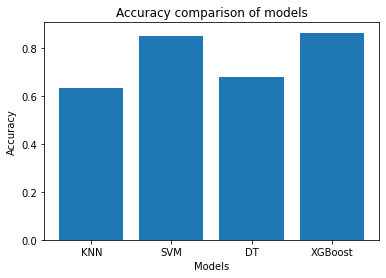

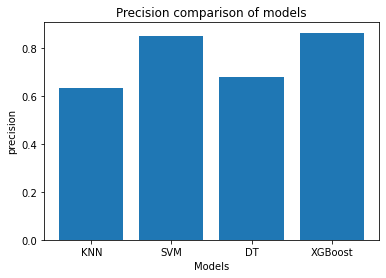

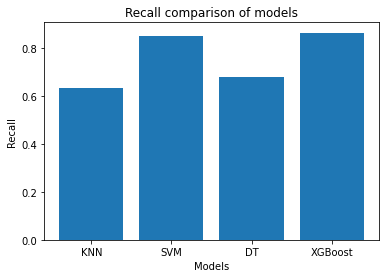

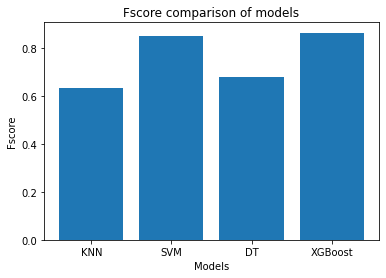

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Convert the text data into a tf-idf representation
vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(data['Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, data['Author'], test_size=0.2)


# K-NEAREST NEIGHBOUR 
# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='micro')
knn_recall = recall_score(y_test, knn_pred,average='micro')
knn_fscore = f1_score (y_test, knn_pred,average='micro')

print('knn_accuracy with Bag of Words = ',knn_accuracy)
print('knn_precision with Bag of Words = ',knn_precision)
print('knn_recall with Bag of Words = ',knn_recall)
print('knn_Fscore with Bag of Words = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='micro')
dt_recall = recall_score(y_test, dt_pred,average='micro')
dt_fscore = f1_score (y_test, dt_pred,average='micro')

print('dt_accuracy with Bag of Words  = ',dt_accuracy)
print('dt_precision with Bag of Words = ',dt_precision)
print('dt_recall with Bag of Words = ',dt_recall)
print('dt_Fscore with Bag of Words = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='micro')
svm_recall = recall_score(y_test, svm_pred,average='micro')
svm_fscore = f1_score (y_test, svm_pred,average='micro')


print('svm_accuracy with Bag of Words = ',svm_accuracy)
print('svm_precision with Bag of Words = ',svm_precision)
print('svm_recall with Bag of Words = ',svm_recall)
print('svm_Fscore with Bag of Words = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='micro')
xgb_recall = recall_score(y_test, xgb_pred,average='micro')
xgb_fscore = f1_score (y_test, xgb_pred,average='micro')


print('xgb_accuracy with Bag of Words = ',xgb_accuracy)
print('xgb_precision with Bag of Words = ',xgb_precision)
print('xgb_recall with Bag of Words = ',xgb_recall)
print('xgb_Fscore with Bag of Words = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
svm_pred = svm.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=svm_pred
df

,Text,actual_data,predicted_data
0,to make her uneasy The possibility of the you...,Jane Austen,Jane Austen
1,you did nt cook but I ll tell you what I m ...,Herman Melville,Maria
2,the third exchange Let all the Battlements th...,William Shakespeare,Herman Melville
3,than the day before every day making me less...,Jane Austen,Jane Austen
4,him he felt as if he were made of glass He ha...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,the sleeplessness of his vow could he so tranq...,Herman Melville,Herman Melville
196,the bottom of the hill He did not wait long b...,Maria,G. K. Chesterton
197,are in Paris And how and who what meanes a...,William Shakespeare,William Shakespeare
198,by the Soueraigne power you haue of vs Put yo...,William Shakespeare,William Shakespeare


# CONFUSION MATRIX AND ERROR ANALYSIS FOR BAG OF WORDS 

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the SVM model with Bag Of Words are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), svm_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the SVM model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the KNN model with Bag Of Words are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), knn_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the KNN model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the decision tree model with Bag Of Words are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), dt_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the Decision Tree model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the XGBoost model with Bag Of Words are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), xgb_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the XGBoost model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the SVM model with Bag Of Words are: 170

The confusion matrix for the SVM model is 

              Herman  Maria  Chesterton  Jane  Shakespeare
Herman           35      1           0     4            0
Maria             1     38           1     4            1
Chesterton        0      0          40     2            0
Jane              2      3           3    27            0
Shakespeare       0      6           1     1           30
--------------------------------------------------------------------------------------------
The number of wrong predictions made by the KNN model with Bag Of Words are: 170

The confusion matrix for the KNN model is 

              Herman  Maria  Chesterton  Jane  Shakespeare
Herman           32      1           5     2            0
Maria             8     25           5     6            1
Chesterton        1      1          38     2            0
Jane             12      3           6    13            1
Shakespeare    

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

def ten_fold_cross_validation(model, X, y):
    kf = KFold(n_splits=10)
    accuracy = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        accuracy.append(model.score(X_test, y_test))
    
    return np.array(accuracy)

In [ ]:
ten_fold_cross_validation(svm,bag_of_words,data['Author'])


array([0.56, 0.66, 0.4 , 0.45, 0.45, 0.6 , 0.67, 0.75, 0.76, 0.83])

# TF-IDF 

knn_accuracy with TF-IDF =  0.86
knn_precision with TF-IDF =  0.86
knn_recall with TF-IDF =  0.86
knn_Fscore with TF-IDF =  0.8599999999999999
----------------------------------------------------------------
dt_accuracy with TF-IDF  =  0.71
dt_precision with TF-IDF =  0.71
dt_recall with TF-IDF =  0.71
dt_Fscore with TF-IDF =  0.7100000000000001
----------------------------------------------------------------
svm_accuracy with TF-IDF =  0.895
svm_precision with TF-IDF =  0.895
svm_recall with TF-IDF =  0.895
svm_Fscore with TF-IDF =  0.895
----------------------------------------------------------------
xgb_accuracy with TF-IDF =  0.855
xgb_precision with TF-IDF =  0.855
xgb_recall with TF-IDF =  0.855
xgb_Fscore with TF-IDF =  0.855
----------------------------------------------------------------


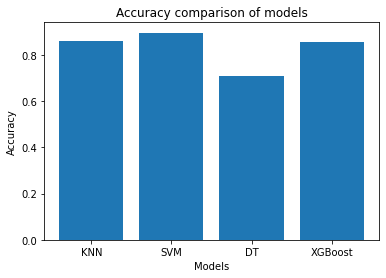

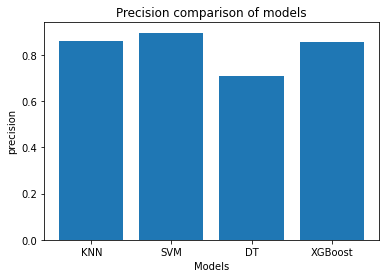

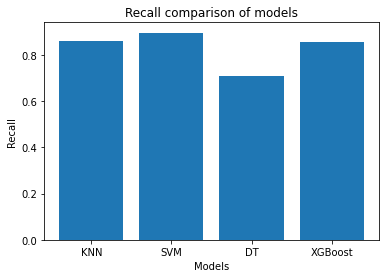

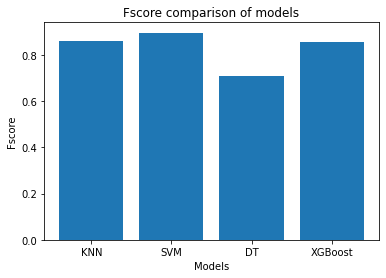

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
#df = pd.read_csv('book_partitions.csv')

# Convert the text data into a tf-idf representation
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['Text'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, data['Author'], test_size=0.2, random_state=42)

# K-NEAREST NEIGHBOUR 
# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='micro')
knn_recall = recall_score(y_test, knn_pred,average='micro')
knn_fscore = f1_score (y_test, knn_pred,average='micro')

print('knn_accuracy with TF-IDF = ',knn_accuracy)
print('knn_precision with TF-IDF = ',knn_precision)
print('knn_recall with TF-IDF = ',knn_recall)
print('knn_Fscore with TF-IDF = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='micro')
dt_recall = recall_score(y_test, dt_pred,average='micro')
dt_fscore = f1_score (y_test, dt_pred,average='micro')

print('dt_accuracy with TF-IDF  = ',dt_accuracy)
print('dt_precision with TF-IDF = ',dt_precision)
print('dt_recall with TF-IDF = ',dt_recall)
print('dt_Fscore with TF-IDF = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='micro')
svm_recall = recall_score(y_test, svm_pred,average='micro')
svm_fscore = f1_score (y_test, svm_pred,average='micro')


print('svm_accuracy with TF-IDF = ',svm_accuracy)
print('svm_precision with TF-IDF = ',svm_precision)
print('svm_recall with TF-IDF = ',svm_recall)
print('svm_Fscore with TF-IDF = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='micro')
xgb_recall = recall_score(y_test, xgb_pred,average='micro')
xgb_fscore = f1_score (y_test, xgb_pred,average='micro')


print('xgb_accuracy with TF-IDF = ',xgb_accuracy)
print('xgb_precision with TF-IDF = ',xgb_precision)
print('xgb_recall with TF-IDF = ',xgb_recall)
print('xgb_Fscore with TF-IDF = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

def ten_fold_cross_validation(model, X, y):
    kf = KFold(n_splits=10)
    accuracy = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        accuracy.append(model.score(X_test, y_test))
    
    return np.array(accuracy)

In [ ]:
ten_fold_cross_validation(svm,tfidf,data['Author'])

array([0.41, 0.46, 0.31, 0.32, 0.31, 0.43, 0.62, 0.66, 0.76, 0.79])

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
svm_pred = svm.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=svm_pred
df

,Text,actual_data,predicted_data
0,only one set of lights that make me more cheer...,G. K. Chesterton,G. K. Chesterton
1,him say that he could listen to her for ever ...,Jane Austen,Jane Austen
2,tremble I remember she said she was sorry we...,Jane Austen,Jane Austen
3,But James will not like to put the horses to ...,Jane Austen,Jane Austen
4,looked the king with his animal elegance his...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,low sunset cloud a long low house mellow ...,G. K. Chesterton,G. K. Chesterton
196,Two guineas exclaimed Jem now quite conqu...,Maria,Maria
197,the admiration of the kitchen However upon c...,Maria,Maria
198,considerable address _at_ _times_ that he cou...,Jane Austen,Jane Austen


# CONFUSION MATRIX AND ERROR ANALYSIS FOR TF-IDF

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the SVM model with Tf-IDF are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), svm_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the SVM model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the KNN model with TF-IDF are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), knn_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the KNN model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the decision tree model with TF-IDF are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), dt_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the Decision Tree model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the XGBoost model with TF-IDF are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), xgb_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the XGBoost model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the SVM model with Tf-IDF are: 157

The confusion matrix for the SVM model is 

              Herman  Maria  Chesterton  Jane  Shakespeare
Herman           28      6           1     2            0
Maria             0     30           0     3            0
Chesterton        1      1          32     4            0
Jane              5      5           9    29            0
Shakespeare       0      3           1     2           38
--------------------------------------------------------------------------------------------
The number of wrong predictions made by the KNN model with TF-IDF are: 157

The confusion matrix for the KNN model is 

              Herman  Maria  Chesterton  Jane  Shakespeare
Herman           29      4           1     3            0
Maria            11     17           1     2            2
Chesterton        3      2          30     3            0
Jane             13      7          10    17            1
Shakespeare       9      1 

# N-GRAM


knn_accuracy with N-GRAM =  0.59
knn_precision with N-GRAM =  0.59
knn_recall with N-GRAM =  0.59
knn_Fscore with N-GRAM =  0.59
----------------------------------------------------------------
dt_accuracy with N-GRAM  =  0.745
dt_precision with N-GRAM =  0.745
dt_recall with N-GRAM =  0.745
dt_Fscore with N-GRAM =  0.745
----------------------------------------------------------------
svm_accuracy with N-GRAM =  0.785
svm_precision with N-GRAM =  0.785
svm_recall with N-GRAM =  0.785
svm_Fscore with N-GRAM =  0.785
----------------------------------------------------------------
xgb_accuracy with N-GRAM =  0.86
xgb_precision with N-GRAM =  0.86
xgb_recall with N-GRAM =  0.86
xgb_Fscore with N-GRAM =  0.8599999999999999
----------------------------------------------------------------


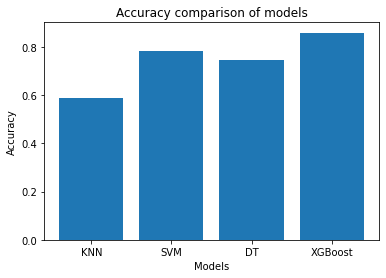

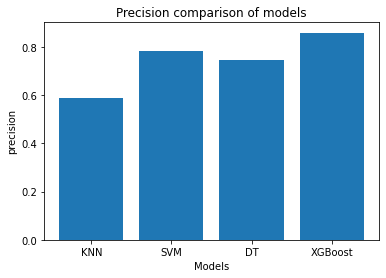

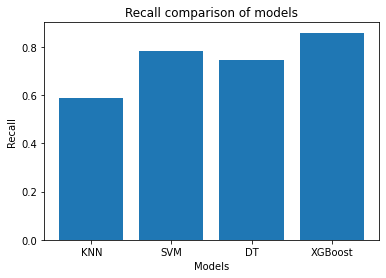

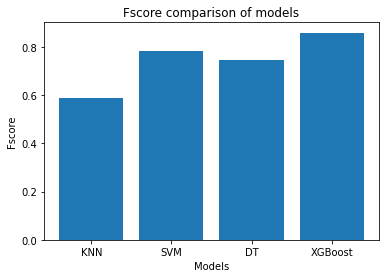

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
#df = pd.read_csv('book_partitions3.csv')

# Convert the text data into a n-gram representation
vectorizer = CountVectorizer(ngram_range=(1, 2))
ngrams = vectorizer.fit_transform(data['Text'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ngrams, data['Author'], test_size=0.2, random_state=42)

# K-NEAREST NEIGHBOUR 
# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='micro')
knn_recall = recall_score(y_test, knn_pred,average='micro')
knn_fscore = f1_score (y_test, knn_pred,average='micro')

print('knn_accuracy with N-GRAM = ',knn_accuracy)
print('knn_precision with N-GRAM = ',knn_precision)
print('knn_recall with N-GRAM = ',knn_recall)
print('knn_Fscore with N-GRAM = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='micro')
dt_recall = recall_score(y_test, dt_pred,average='micro')
dt_fscore = f1_score (y_test, dt_pred,average='micro')

print('dt_accuracy with N-GRAM  = ',dt_accuracy)
print('dt_precision with N-GRAM = ',dt_precision)
print('dt_recall with N-GRAM = ',dt_recall)
print('dt_Fscore with N-GRAM = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='micro')
svm_recall = recall_score(y_test, svm_pred,average='micro')
svm_fscore = f1_score (y_test, svm_pred,average='micro')


print('svm_accuracy with N-GRAM = ',svm_accuracy)
print('svm_precision with N-GRAM = ',svm_precision)
print('svm_recall with N-GRAM = ',svm_recall)
print('svm_Fscore with N-GRAM = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='micro')
xgb_recall = recall_score(y_test, xgb_pred,average='micro')
xgb_fscore = f1_score (y_test, xgb_pred,average='micro')


print('xgb_accuracy with N-GRAM = ',xgb_accuracy)
print('xgb_precision with N-GRAM = ',xgb_precision)
print('xgb_recall with N-GRAM = ',xgb_recall)
print('xgb_Fscore with N-GRAM = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
svm_pred = svm.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=svm_pred
df

,Text,actual_data,predicted_data
0,only one set of lights that make me more cheer...,G. K. Chesterton,G. K. Chesterton
1,him say that he could listen to her for ever ...,Jane Austen,Jane Austen
2,tremble I remember she said she was sorry we...,Jane Austen,Maria
3,But James will not like to put the horses to ...,Jane Austen,Jane Austen
4,looked the king with his animal elegance his...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,low sunset cloud a long low house mellow ...,G. K. Chesterton,G. K. Chesterton
196,Two guineas exclaimed Jem now quite conqu...,Maria,Maria
197,the admiration of the kitchen However upon c...,Maria,Maria
198,considerable address _at_ _times_ that he cou...,Jane Austen,Maria


# ERROR ANALYSIS AND CONFUSION MATRIX FOR N-GRAM 

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the SVM model with N-GRAM are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), svm_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the SVM model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the KNN model with N-GRAM are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), knn_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the KNN model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the decision tree model with N-GRAM are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), dt_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the Decision Tree model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the XGBoost model with N-GRAM are:",count)

conf_matrix = confusion_matrix(y_test.to_numpy(), xgb_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Shakespeare'], columns=['Herman', 'Maria','Chesterton','Jane','Shakespeare'])
print('\nThe confusion matrix for the XGBoost model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the SVM model with N-GRAM are: 157

The confusion matrix for the SVM model is 

              Herman  Maria  Chesterton  Jane  Shakespeare
Herman           28      6           1     2            0
Maria             0     30           0     3            0
Chesterton        1      1          32     4            0
Jane              5      5           9    29            0
Shakespeare       0      3           1     2           38
--------------------------------------------------------------------------------------------
The number of wrong predictions made by the KNN model with N-GRAM are: 157

The confusion matrix for the KNN model is 

              Herman  Maria  Chesterton  Jane  Shakespeare
Herman           29      4           1     3            0
Maria            11     17           1     2            2
Chesterton        3      2          30     3            0
Jane             13      7          10    17            1
Shakespeare       9      1 

# CHAMPION MODEL = SVM WITH TF-IDF AVERAGING AN ACCURACY OF 0.94

# 10 FOLD COSS VALIDATION FOR CHAMPION MODEL 


In [ ]:
import numpy as np
from sklearn.model_selection import KFold

def ten_fold_cross_validation(model, X, y):
    kf = KFold(n_splits=10)
    accuracy = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        accuracy.append(model.score(X_test, y_test))
    
    return np.array(accuracy)


In [ ]:
ten_fold_cross_validation(svm,bag_of_words,data['Author'])

NameError: ignored